### First step is Data Visualization and Preprocessing

In [1]:
# importing the necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')


# loading in the ratings data
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

In [2]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# since the ratings data don't contain movie names we will load them from the movies spreadsheet
movie_df = pd.read_csv('ml-latest-small/movies.csv')

In [4]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# we have our desired features in separate df objects, so we merge them
movie_df = pd.merge(ratings_df, movie_df, on='movieId')

In [6]:
movie_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
# creating a df containing the average rating and rating count of each movie
ratings_avg_count = pd.DataFrame(movie_df.groupby('title')['rating'].mean())

In [8]:
ratings_avg_count['ratings_count'] = movie_df.groupby('title')['rating'].count()

In [9]:
ratings_avg_count.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

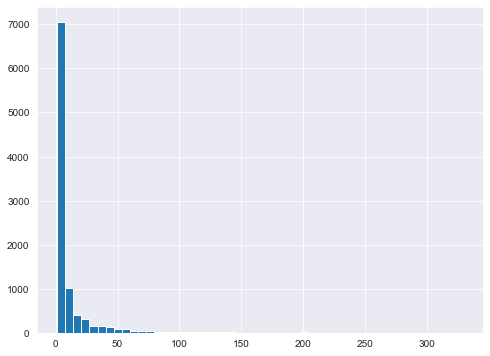

In [12]:
# plotting a histogram for the number of ratings
plt.figure(figsize=(8,6))
ratings_avg_count['ratings_count'].hist(bins=50)

<AxesSubplot:>

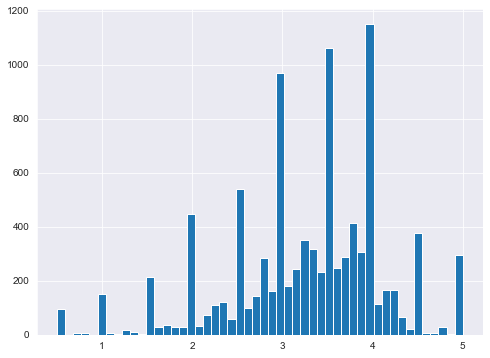

In [13]:
# now we'll plot a histogram for avg rating per movie
plt.figure(figsize=(8,6))
ratings_avg_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

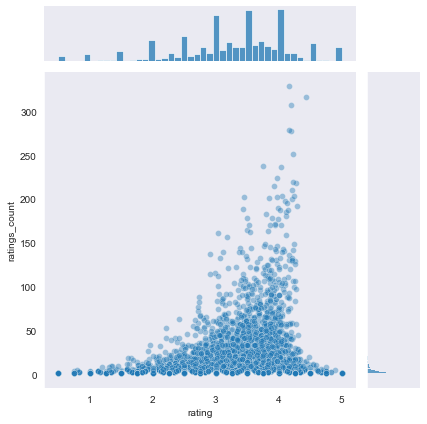

In [17]:
# lets see if the assumption that movies with more ratings are generally rated higher holds true
# the idea behind this is that people will tell each other about good movies
# and so they will be watched more and potentially rated more
plt.figure(figsize=(8,6))
sns.jointplot(x='rating', y='ratings_count', data=ratings_avg_count, alpha = 0.4)
plt.show()

In [19]:
# we will create a matrix of movie titles and ratings so that we can compare similarities
# this matrix will be sparse since no movie is rated by ever user
user_movie_rating = movie_df.pivot_table(index='userId', columns='title', values='rating')

In [20]:
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# lets get the rating for anohana the movie (pretty good if you haven't seen it btw)
anohana = user_movie_rating['anohana: The Flower We Saw That Day - The Movie (2013)']

In [31]:
anohana.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: anohana: The Flower We Saw That Day - The Movie (2013), dtype: float64

In [32]:
# looks like anohana doesn't have many ratings in this dataset
# this means it won't be great for a recommender system example
# lets try another movie like Forrest Gump
forrest_gump = user_movie_rating['Forrest Gump (1994)']

In [41]:
forrest_gump.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [42]:
# we will use the corrwith() function to find movies similar to Forrest Gump
movies_like_forrest_gump = user_movie_rating.corrwith(forrest_gump)

# we will collect the similar movies in a df object
# correlation comes from the corrwith function
like_forrest_gump_df = pd.DataFrame(movies_like_forrest_gump, columns=['Correlation'])
like_forrest_gump_df.dropna(inplace=True)
like_forrest_gump_df.head()

/Users/elslb/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/elslb/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [44]:
# now lets sort the movies in descending order so we can see which movies are most similar to Forrest Gump
like_forrest_gump_df.sort_values(by='Correlation', ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


In [45]:
# this looks a little strange, and that is because any movie rated highly by people that also
# rated Forrest Gump highly is present here, so Correlation alone is not a good metric
# let's limit the returned movies to those that only have 50 or more ratings

# first we'll join the ratings_count column from the ratings_avg_count df
like_forrest_gump_df = like_forrest_gump_df.join(ratings_avg_count['ratings_count'])
like_forrest_gump_df.head(10)

,Correlation,ratings_count
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.752057,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.088009,54
"10,000 BC (2008)",-0.143823,17


In [46]:
# now we can set the threshold for ratings_count that we would like to meet to include the movies
like_forrest_gump_df[like_forrest_gump_df['ratings_count']>50].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,ratings_count
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53


In [ ]:
# Great! Now we can see movies similar to Forrest Gump with some more confidence in our output!